# OpenCV Tutorials

## Part 1:  Preparing Exercises

### Exercise 1:
Read an image and show it on screen.

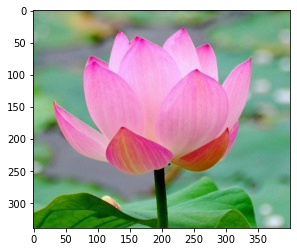

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import sys

filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]
plt.imshow(img)
plt.show()

### Exercise 2:
Read an image and print the minimum, maximum and average values of all pixels.

min =  0
max =  255
average =  145.82532940019667


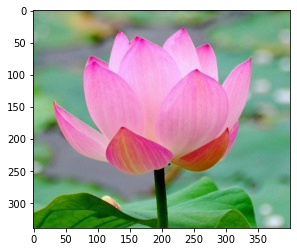

In [2]:
filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

print("min = ",img.min())
print("max = ",img.max())
print("average = ",img.mean())

plt.imshow(img)
plt.show()


### Exercise 3:
Flip an image vertically and show it on screen.

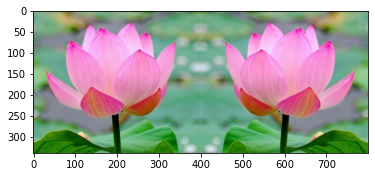

In [3]:
filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

x = cv2.flip(img,1)    # 0:h  1:v   -1:v+h

c = np.hstack((img,x))

plt.imshow(c)
plt.show()

### Exercise 4:
Flip an image horizontally and show it on screen.

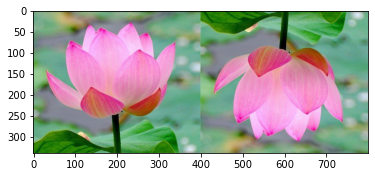

In [4]:
filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

x = cv2.flip(img,0)    # 0:h  1:v   -1:v+h

c = np.hstack((img,x))

plt.imshow(c)
plt.show()

### Exercise 5:
Flip an image vertically & horizontally and show it on screen.

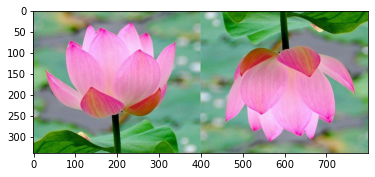

In [5]:
filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

x = cv2.flip(img,-1)    # 0:h  1:v   -1:v+h

c = np.hstack((img,x))

plt.imshow(c)
plt.show()

### Exercise 6:
Transpose an image and show it on screen.

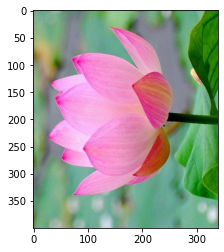

In [6]:
filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

x = cv2.transpose(img)

plt.imshow(x)
plt.show()

### Exercise 7:
Create a green image of size (256,256,3) and show it on the screen.

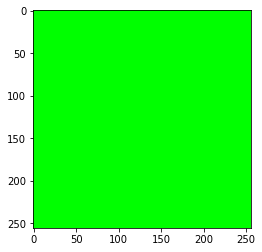

In [15]:
img = np.zeros((256,256,3),np.uint8) # unsigned integer (8bits)
img[:,:,1] = 255     # img[:,:] = [0,255,0]

plt.imshow(img)
plt.show()

### Exercise 8:
append a black border to an image of size 1.

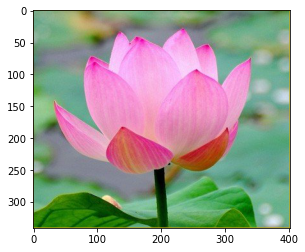

In [7]:
filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

n = img.shape[0]
m = img.shape[1]
k = img.shape[2]

A = np.zeros((n,m+2,k),np.uint8)
A[:,:] = [191, 165, 17]
B = np.zeros((n+2,m+2,k),np.uint8)
B[:,:] = [191, 165, 17]

for i in range(n):
    A[i,1:m+1,0:k] = img[i,:,:]
    
B[1:n+1]= A

plt.imshow(B)
plt.show()

### Exercise 9:
append a black border to an image of size 10.

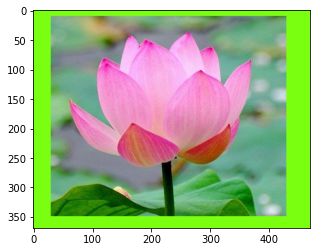

In [8]:
filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

x = cv2.copyMakeBorder(img, 10, 20, 30, 40, cv2.BORDER_CONSTANT, None, [123,255,16])

plt.imshow(x)
plt.show()

### Exercise 10:
Read an image M of size (n,m,3) and reduce it to (n,m)
by applying the following equation:
A = (M[i,j,0] + M[i,j,2] +M[i,j,2]) / 3


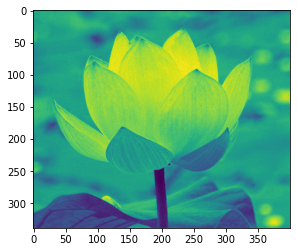

In [9]:
def get_gray(img):
    n = img.shape[0]
    m = img.shape[1]
    k = img.shape[2]
    # img = ((img[:,:,0] + img[:,:,1] +img[:,:,2]) / 3).astype(np.uint8)

    E = []
    for i in range(n):   # axis = 2
        for j in range(m):
            E.append(img[i][j].sum()/k)
    E = np.array(E)
    E = (E.reshape((n,m))).astype(np.uint8)
    return E

filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

x = get_gray(img)

plt.imshow(x)
plt.show()

## Part 2:
OpenCV Drawing

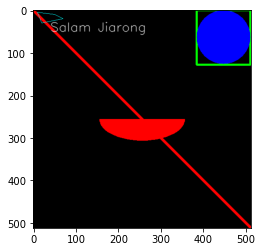

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a line
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

# Draw a Rectangle
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

# Draw a Circle
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

# Draw an Ellipse
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

# Draw a Polygon
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

# Draw a Text
cv2.putText(img,'Salam Jiarong', (40,50), 
            cv2.FONT_HERSHEY_SIMPLEX, 
            1, (255,255,255), 1, cv2.LINE_AA)
plt.imshow(img)
plt.show()


## Part 2:  Images Filtering

### 2D Convolution

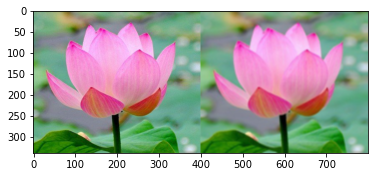

In [10]:
# Read Image in BGR (Blue, Green, Red)
img = cv2.imread("images/lotus.jpg")
img = img[:,:,::-1]

# Convolution 2D
kernel = np.ones((5,5),np.float32)/25
res    = cv2.filter2D(img,-1,kernel)

# Vertical stacking
all_imgs = np.hstack((img,res))

plt.imshow(all_imgs, aspect='equal')
plt.show()

### Blurring 1/2

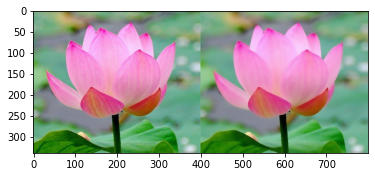

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

# Blurring (Averaging)
# res = cv2.blur(img,(5,5))
# res = cv2.boxFilter(img,-1,(3,3))   # it is similar
# res = cv2.GaussianBlur(img,(5,5),0)
# res = cv2.medianBlur(img,5)
res = cv2.bilateralFilter(img,9,75,75)

# Vertical stacking
all_imgs = np.hstack((img,res))

plt.imshow(all_imgs)
plt.show()

#### Exercise1:  
Use all blurring functions and display all results in a grid of images 2x3 as shown below.  You can use putText() for writing the texts on each image.

### Morphology

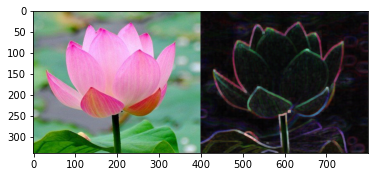

In [12]:
filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

# Morphological Transformation
kernel= np.ones((5,5),np.uint8)
# res = cv2.erode(img,kernel,iterations = 1)             #Erosion
# res = cv2.dilate(img,kernel,iterations = 1)            #Dilation
# res = cv2.morphologyEx(img,cv2.MORPH_OPEN, kernel)     #Opening Kernel
# res = cv2.morphologyEx(img,cv2.MORPH_CLOSE, kernel)    #Closing Kernel
res = cv2.morphologyEx(img,cv2.MORPH_GRADIENT, kernel)   #Gradient Kernel
# res = cv2.morphologyEx(img,cv2.MORPH_TOPHAT, kernel)   #Top Hat Kernel
# res = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel) #Black Hat Kernel
# res = cv2.morphologyEx(img,cv2.MORPH_RECT, kernel)     #Rectangle Kernel
# res = cv2.morphologyEx(img,cv2.MORPH_ELLIPSE, kernel)  #Ellipse Kernel
# res = cv2.morphologyEx(img,cv2.MORPH_CROSS, kernel)    #Cross-shaped Kernel

all_imgs = np.hstack((img, res))

# Show the images
plt.imshow(all_imgs)
plt.show()

### Gradients

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


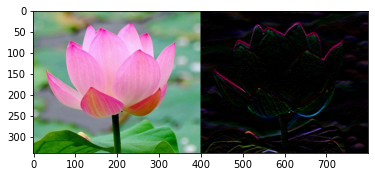

In [13]:
filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

# Gradients
#res = cv2.Laplacian(img,cv2.CV_64F)			# Laplacian
#res = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)	# Sobel (Horizontal)
res = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)	# Sobel (Vertical)

# IMPORTANT: because ‘res’ has values greater than 255
img = img / img.max() # the range will be 0~1
res = res / res.max() # the range will be 0~1

# Vertical Stacking
all_imgs = np.hstack((img,res))

# Show the images
plt.imshow(all_imgs)
plt.show()

### Canny Edge Detection

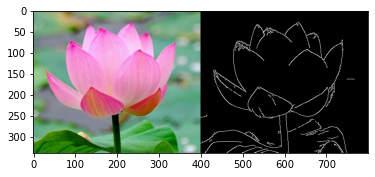

In [14]:
filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

# Canny Edge Detection
edges = cv2.Canny(img,100,200)
edges = np.dstack((edges,edges,edges))

# Vertical Stacking
all_imgs = np.hstack((img,edges))

# Show the images
plt.imshow(all_imgs)
plt.show()

## Part 3: Images Thresholds

#### Exercises 2:  
Use only numpy for performing the following exercises:
```
Ex0: Write a function “to_grayscale” of 1 input: img. 
     The function will return a grayscale image.

Ex1: Write a function “binary_thresh” of 2 inputs: img & thresh. 
     The function will set all image’s values <= thresh to 0 and
     all values > thresh to 255. (the input image should be gray)

Ex2: Write a function “binary_inv_thresh” of 2 inputs: img & thresh. 
     The function will set all image’s values <= thresh to 255 and
     all values > thresh to 0. (the input image should be gray)

Ex3: Write a function “truncate_thresh” of 2 inputs: img & thresh. 
     The function will set all image’s values > thresh to thresh. 
     (the input image should be gray)

Ex4: Write a function “zero_thresh” of 2 inputs: img & thresh. 
     The function will set all image’s values less than thresh to 0.
     (the input image should be gray)

Ex5: Write a function “zero_inv_thresh” of 2 inputs: img & thresh. 
     The function will set all image’s values greater than thresh to 0.
     (the input image should be gray)

Ex6: Write a function “thresholding” of 3 inputs: img, thresh, mode. 
     mode = 0,1,2,3,4 for exercises 1,2,3,4,5 respectively.
     (the input image should be gray)
```

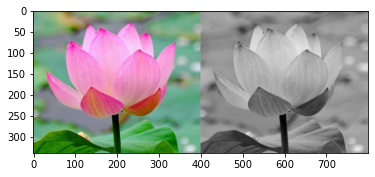

In [15]:
def binary_thresh(img,thresh):
    img[img<=thresh] = 0
    img[img>thresh] = 255
    return img

def binary_inv_thresh(img,thresh):
    # img[img<=thresh] = 1
    # img[img>thresh] = 0
    # img[img==1] = 255
    img[img<=thresh] = 0
    img[img>thresh] = 255
    img = 255 - img
    return img

def truncate_thresh(img,thresh):
    img[img>thresh] = thresh
    return img

def zero_thresh(img,thresh):
    img[img<thresh] = 0
    return img

def zero_inv_thresh(img,thresh):
    img[img>thresh] = 0
    return img

def thresholding(img,thresh,mode):
    if mode == 1:
        return binary_thresh(img,thresh)
    elif mode == 2:
        return binary_inv_thresh(img,thresh)
    elif mode == 3:
        return truncate_thresh(img,thresh)
    elif mode == 4:
        return zero_thresh(img,thresh)
    elif mode == 5:
        return zero_inv_thresh(img,thresh)
    return img

filename = "images/lotus.jpg"
# mode = 0,1,2,3,4,5 for exercises 1,2,3,4,5,6 respectively.
mode = int(0)
img = cv2.imread(filename)
img = img[:,:,::-1]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.dstack((gray,gray,gray))

# x = binary_thresh(gray,127)
# x = binary_inv_thresh(gray,127)
# x = truncate_thresh(gray,127)
# x = zero_thresh(gray,127)
# x = zero_inv_thresh(gray,127)
x = thresholding(gray,127,mode)
all_imgs = np.hstack((img,x))

# Show the images
plt.imshow(all_imgs)
plt.show()

### Threshold

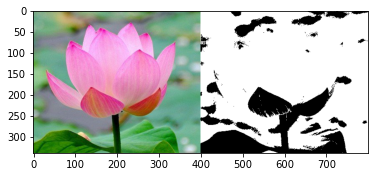

In [16]:
filename = "images/lotus.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Calculate the threshold
ret,thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# ret,thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
# ret,thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
# ret,thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)
# ret,thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)

# Diagonal Stacking
thresh = np.dstack((thresh,thresh,thresh))

# Vertical Stacking
all_imgs = np.hstack((img,thresh))

# Show the images
plt.imshow(all_imgs)
plt.show()

## Part 4:  Images Contours

### Contours 1

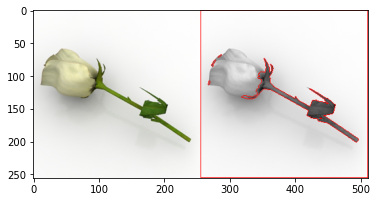

In [33]:
filename = "images/flowers3.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# Calculate the threshold
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

# Find Contours
contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

# Draw Contours
gray = np.dstack((gray,gray,gray))
gray = cv2.drawContours(gray, contours, -1, (255,0,0), 1)

# Vertical Stacking
all_imgs = np.hstack((img,gray))

# Show the images
plt.imshow(all_imgs)
plt.show()

#### Exercise 1:  
Draw the contour that has the greater number of points.

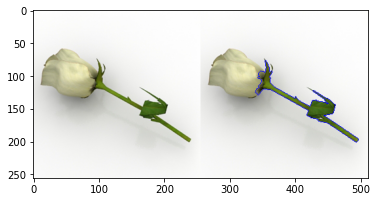

In [18]:
filename = "images/flowers3.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

img1  = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Calculate the threshold
ret,thresh = cv2.threshold(gray,127,255,0)

# Find Contours
contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

A = [len(contours[i]) for i in range(len(contours))]
A = np.array(A)
m = A.argmax()

# Draw Contours

gray = cv2.drawContours(img1, contours, m, (0,0,255), 1)


# Vertical Stacking
all_imgs = np.hstack((img,gray))

# Show the images
plt.imshow(all_imgs)
plt.show()

#### Exercise 2:  
Calculate the centroid of the contour that has the greater number of points and draw it on the picture.

[ 82  82  82  83  83  84  84  84  85  85  87  87  88  89  90  91  91  92
  94  95  95  96  97  98  99  99 101 101 102 102]
90


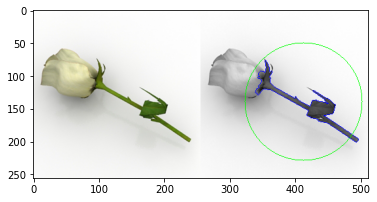

In [19]:
import math
filename = "images/flowers3.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

img1  = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Calculate the threshold
ret,thresh = cv2.threshold(gray,127,255,0)

# Find Contours
contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

A = [len(contours[i]) for i in range(len(contours))]
A = np.array(A)
m = A.argmax()

x = int(contours[m][:,:,0].mean())
y = int(contours[m][:,:,1].mean())

A = contours[m]
n = A.shape[0]
C = []

for i in range(n):
    r = math.sqrt((x-A[i,0,0])**2+(y-A[i,0,1])**2)
    C.append(int(r))
C = sorted(C)
C = np.array(C)
C = C[-30:]
print(C)
r = int(C.mean())
print(r)
# Draw Contours
gray = np.dstack((gray,gray,gray))
gray = cv2.drawContours(gray, contours, m, (0,0,255), 1)
gray = cv2.circle(gray, (x,y), r, (0,255,0), 1)

# Vertical Stacking
all_imgs = np.hstack((img,gray))

# Show the images
plt.imshow(all_imgs)
plt.show()

#### Exercise 3:  
Calculate the perimeter of the contour that has the greater number of points.

629.9381669041254
629.9381604194641


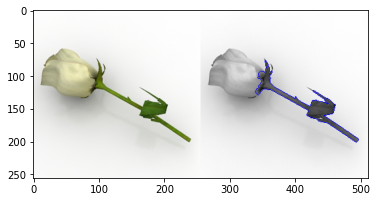

In [20]:
import math
filename = "images/flowers3.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

img1  = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Calculate the threshold
ret,thresh = cv2.threshold(gray,127,255,0)

# Find Contours
contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

C = [len(contours[i]) for i in range(len(contours))]
C = np.array(C)
m = C.argmax()

A = contours[m]
n = A.shape[0]
s = 0

for i in range(n-1):
    s  = s + math.sqrt((A[i,0,0]-A[i+1,0,0])**2+(A[i,0,1]-A[i+1,0,1])**2)
t = math.sqrt((A[0,0,0]-A[n-1,0,0])**2+(A[0,0,1]-A[n-1,0,1])**2)
l = t + s
print(l)
perimeter = cv2.arcLength(A,True)
print(perimeter)
# d1 = math.sqrt((A[0,0,0]-A[1,0,0])**2+(A[0,0,1]-A[1,0,1])**2)
# d2 = math.sqrt((A[1,0,0]-A[2,0,0])**2+(A[1,0,1]-A[2,0,1])**2)
# d3 = math.sqrt((A[2,0,0]-A[3,0,0])**2+(A[2,0,1]-A[3,0,1])**2)
# d4 = math.sqrt((A[0,0,0]-A[3,0,0])**2+(A[0,0,1]-A[3,0,1])**2)
# l = d1+d2+d3+d4
# Draw Contours
gray = np.dstack((gray,gray,gray))
gray = cv2.drawContours(gray, contours, m, (0,0,255), 1)

# Vertical Stacking
all_imgs = np.hstack((img,gray))

# Show the images
plt.imshow(all_imgs)
plt.show()

### Contours 2 : Features

In [53]:
filename = "images/flowers3.jpg"
img = cv2.imread(filename)
img1  = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Calculate the threshold and Find Contours
ret,thresh = cv2.threshold(gray,127,255,0)
contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
index = np.argmax([len(cnt) for cnt in contours])
# Features
# ========
# Moments
M = cv2.moments(contours[index])
# Centroid
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)
print()
# Area
print(M['m00'])                         # Way 1
print()
print(cv2.contourArea(contours[index])) # Way 2
print()
# Perimeter
perimeter = cv2.arcLength(contours[index],True)
print(perimeter)

159 141

2470.5

2470.5

621.4528777599335


### Contours 3 : Approximation

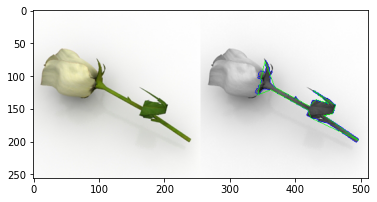

In [21]:
filename = "images/flowers3.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

img1  = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Calculate the threshold and Find Contours
ret,thresh = cv2.threshold(gray,127,255,0)
contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
index= np.argmax([len(cnt) for cnt in contours])
gray = np.dstack((gray,gray,gray))
gray = cv2.drawContours(gray, contours, index, (0,0,255), 1)

# Approximation
perimeter= cv2.arcLength(contours[index],True)
epsilon  = perimeter / 100
approx   = cv2.approxPolyDP(contours[index],epsilon,True) # Polygone
gray     = cv2.drawContours(gray, [approx], -1, (0,255,0), 1)

# Vertical stacking
all_imgs = np.hstack((img,gray))

# Show the images
plt.imshow(all_imgs)
plt.show()

### Contours 4 : Hull Convex

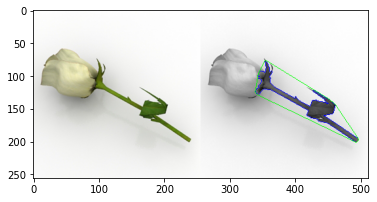

In [22]:
filename = "images/flowers3.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

img1  = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Calculate the threshold and Find Contours
ret,thresh = cv2.threshold(gray,127,255,0)
contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
index= np.argmax([len(cnt) for cnt in contours])
gray = np.dstack((gray,gray,gray))
gray = cv2.drawContours(gray, contours, index, (0,0,255), 1)

# Convex Hull
hull = cv2.convexHull(contours[index])
gray = cv2.drawContours(gray, [hull], -1, (0,255,0), 1)

# Vertical stacking
all_imgs = np.hstack((img,gray))

# Show the images
plt.imshow(all_imgs)
plt.show()

### Contours 5 : Bounding Rectangle 1/2

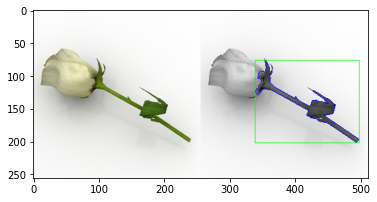

In [23]:
filename = "images/flowers3.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

img1  = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Calculate the threshold and Find Contours
ret,thresh = cv2.threshold(gray,127,255,0)
contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
index= np.argmax([len(cnt) for cnt in contours])
gray = np.dstack((gray,gray,gray))
gray = cv2.drawContours(gray, contours, index, (0,0,255), 1)

# Bounding Rectangle 1/2
x,y,w,h = cv2.boundingRect(contours[index])
gray = cv2.rectangle(gray,(x,y),(x+w,y+h),(0,255,0),1)

# Vertical stacking
all_imgs = np.hstack((img,gray))

# Show the images
plt.imshow(all_imgs)
plt.show()

### Contours 6 : Bounding Rectangle 2/2

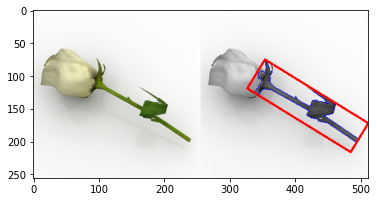

In [24]:
filename = "images/flowers3.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

img1  = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Calculate the threshold and Find Contours
ret,thresh = cv2.threshold(gray,127,255,0)
contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
index= np.argmax([len(cnt) for cnt in contours])
gray = np.dstack((gray,gray,gray))
gray = cv2.drawContours(gray, contours, index, (0,0,255), 1)

# Bounding Rectangle 2/2
rect= cv2.minAreaRect(contours[index])
box = cv2.boxPoints(rect)
box = box.astype(int)
gray= cv2.drawContours(gray,[box],0,(255,0,0),2)

# Vertical stacking
all_imgs = np.hstack((img,gray))

# Show the images
plt.imshow(all_imgs)
plt.show()

### Contours 7 : Minimum Enclosing Circle

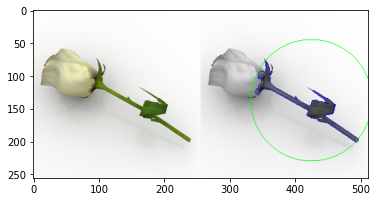

In [25]:
filename = "images/flowers3.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

img1  = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Calculate the threshold and Find Contours
ret,thresh = cv2.threshold(gray,127,255,0)
contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
index= np.argmax([len(cnt) for cnt in contours])
gray = np.dstack((gray,gray,gray))
gray = cv2.drawContours(gray, contours, index, (0,0,255), 1)

# Minimum Enclosing Circle
(x,y),radius = cv2.minEnclosingCircle(contours[index])
center = (int(x),int(y))
radius = int(radius)
gray   = cv2.circle(gray,center,radius,(0,255,0),1)

# Vertical stacking
all_imgs = np.hstack((img,gray))

# Show the images
plt.imshow(all_imgs)
plt.show()

### Contours 8 : Fitting an Ellipse

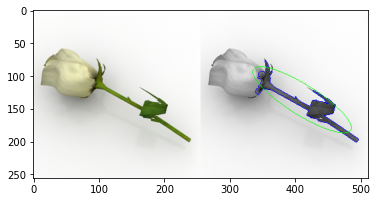

In [26]:
filename = "images/flowers3.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

img1  = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Calculate the threshold and Find Contours
ret,thresh = cv2.threshold(gray,127,255,0)
contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
index= np.argmax([len(cnt) for cnt in contours])
gray = np.dstack((gray,gray,gray))
gray = cv2.drawContours(gray, contours, index, (0,0,255), 1)

# Fitting an Ellipse
ellipse = cv2.fitEllipse(contours[index])
gray    = cv2.ellipse(gray,ellipse,(0,255,0),1)

# Vertical stacking
all_imgs = np.hstack((img,gray))

# Show the images
plt.imshow(all_imgs)
plt.show()

### Contours 9 : Fitting a Line

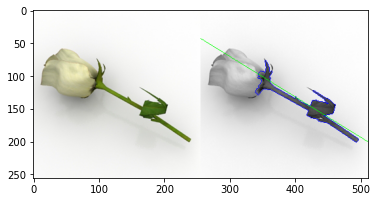

In [27]:
filename = "images/flowers3.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]

img1  = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Calculate the threshold and Find Contours
ret,thresh = cv2.threshold(gray,127,255,0)
contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
index= np.argmax([len(cnt) for cnt in contours])
gray = np.dstack((gray,gray,gray))
gray = cv2.drawContours(gray, contours, index, (0,0,255), 1)

# Fitting a Line
H, W  = gray.shape[:2]
[vx,vy,x,y]= cv2.fitLine(contours[index], cv2.DIST_L2,0,0.01,0.01)
lefty  = int((   - x  * vy / vx) + y)
righty = int(((W - x) * vy / vx) + y)
gray   = cv2.line(gray, (W-1,righty), (0,lefty), (0,255,0), 1)

# Vertical stacking
all_imgs = np.hstack((img,gray))

# Show the images
plt.imshow(all_imgs)
plt.show()

## Part 5 :  Detecting Lines


### Hough Lines 1/2

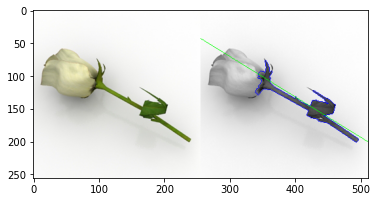

In [28]:
# Read Image in BGR (Blue, Green, Red) and convert it to Gray
filename = "images/highway.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.dstack((gray,gray,gray))

# Canny Edge Detection
edges = cv2.Canny(gray,180,250,apertureSize = 3)

# Hough Lines
lines = cv2.HoughLines(edges,rho=1,theta=np.pi/180,threshold=200)
for i in range(len(lines)):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        y1 = gray.shape[0] >> 1
        x1 = int((rho - y1 * b) / a)
        y2 = gray.shape[0]
        x2 = int((rho - y2 * b) / a)
        cv2.line(gray,(x1,y1),(x2,y2),(0,255,0),2)

# Show the images
plt.imshow(all_imgs)
plt.show()

### Hough Lines 2/2

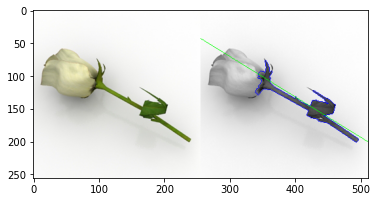

In [29]:
# Read Image in BGR (Blue, Green, Red) and convert it to Gray
filename = "images/highway.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.dstack((gray,gray,gray))

# Canny Edge Detection
edges = cv2.Canny(gray,180,250,apertureSize = 3)

# Hough Lines
lines = cv2.HoughLinesP(edges,rho = 1, theta=np.pi/180,
threshold    = 200,
minLineLength= 100,
maxLineGap   = 10)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(gray,(x1,y1),(x2,y2),(0,255,0),2)

# Show the images
plt.imshow(all_imgs)
plt.show()

## Part 6 :  Image Features

### Harris Corner Detector

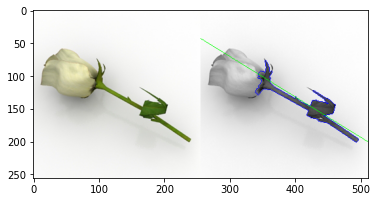

In [30]:
# Read Image in BGR (Blue, Green, Red) and convert it to Gray
filename = "images/highway.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Corners Detection
dst = cv2.cornerHarris(gray,
                       blockSize= 4,    # Neighborhood size
                       ksize    = 7,    # Aperture parameter
                       k        = 0.04) # Harris free parameter

# result is dilated for marking the corners, not important
# dst = cv2.dilate(dst,None)
# Threshold may vary depending on the image.
threshold = 0.001 * dst.max()
gray = np.dstack((gray,gray,gray))
gray[dst > threshold] = [0,0,255]

# Show the images
plt.imshow(all_imgs)
plt.show()

### Shi Thomas Corner Detector

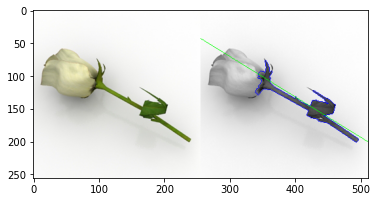

In [31]:
# Read Image in BGR (Blue, Green, Red) and convert it to Gray
filename = "images/highway.jpg"
img = cv2.imread(filename)
img = img[:,:,::-1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Corners Detection
dst = cv2.cornerHarris(gray,
                       blockSize= 4,    # Neighborhood size
                       ksize    = 7,    # Aperture parameter
                       k        = 0.04) # Harris free parameter

# result is dilated for marking the corners, not important
# dst = cv2.dilate(dst,None)
# Threshold may vary depending on the image.
threshold = 0.001 * dst.max()
gray = np.dstack((gray,gray,gray))
gray[dst > threshold] = [0,0,255]

# Show the images
plt.imshow(all_imgs)
plt.show()